In [153]:
from CreateFeatures import *
import pandas as pd
from sklearn import preprocessing

In [154]:
# 读取数据
df = pd.read_csv(r'binance.csv')
df = df.loc[ : , ~df.columns.str.contains("^Unnamed")]
df

time      open      high       low     close    volume
0        2019-09-08 17:57:00  10000.00  10000.00  10000.00  10000.00     0.001
1        2019-09-08 17:58:00  10000.00  10000.00  10000.00  10000.00     0.000
2        2019-09-08 17:59:00  10000.00  10000.00  10000.00  10000.00     0.001
3        2019-09-08 18:00:00  10000.00  10000.00  10000.00  10000.00     0.000
4        2019-09-08 18:01:00  10000.00  10000.00  10000.00  10000.00     0.000
...                      ...       ...       ...       ...       ...       ...
1020732  2021-08-17 14:10:00  46322.32  46350.00  46276.00  46328.40   868.341
1020733  2021-08-17 14:11:00  46326.42  46369.17  46315.01  46316.65   270.749
1020734  2021-08-17 14:12:00  46316.64  46316.64  46155.95  46224.99  2055.116
1020735  2021-08-17 14:13:00  46224.99  46270.88  46162.26  46200.60   990.972
1020736  2021-08-17 14:14:00  46200.59  46259.88  46180.56  46229.98   285.571

[1020737 rows x 6 columns]

In [155]:
data = df.loc[7000:,:].copy()  #32042
data

time      open      high       low     close    volume
7000     2019-09-13 14:38:00  10293.26  10305.15  10293.26  10305.15    16.200
7001     2019-09-13 14:39:00  10304.26  10305.85  10298.01  10298.01     5.034
7002     2019-09-13 14:40:00  10297.61  10304.49  10297.51  10299.10    20.509
7003     2019-09-13 14:41:00  10299.46  10301.41  10299.46  10300.71    11.741
7004     2019-09-13 14:42:00  10298.21  10298.21  10295.93  10296.56     9.968
...                      ...       ...       ...       ...       ...       ...
1020732  2021-08-17 14:10:00  46322.32  46350.00  46276.00  46328.40   868.341
1020733  2021-08-17 14:11:00  46326.42  46369.17  46315.01  46316.65   270.749
1020734  2021-08-17 14:12:00  46316.64  46316.64  46155.95  46224.99  2055.116
1020735  2021-08-17 14:13:00  46224.99  46270.88  46162.26  46200.60   990.972
1020736  2021-08-17 14:14:00  46200.59  46259.88  46180.56  46229.98   285.571

[1013737 rows x 6 columns]

In [156]:
# 如何处理label_Y类别不平衡问题


In [157]:
# 收益率计算与分类
data['close_shift(-5)'] = data['close'].shift(-5)
data['label5'] = data['close_shift(-5)']-data['close']
data.loc[data.label5>=20,'label'] = 1
data.loc[data.label5<=-20,'label'] = -1
data.loc[(data.label5<20)&(data.label5>-20),'label'] = 0
droplist = [x for x in data.columns.tolist() if 'close_shift' in x]
data = data.drop(droplist,axis=1)

In [158]:
data

time      open      high       low     close  \
7000     2019-09-13 14:38:00  10293.26  10305.15  10293.26  10305.15   
7001     2019-09-13 14:39:00  10304.26  10305.85  10298.01  10298.01   
7002     2019-09-13 14:40:00  10297.61  10304.49  10297.51  10299.10   
7003     2019-09-13 14:41:00  10299.46  10301.41  10299.46  10300.71   
7004     2019-09-13 14:42:00  10298.21  10298.21  10295.93  10296.56   
...                      ...       ...       ...       ...       ...   
1020732  2021-08-17 14:10:00  46322.32  46350.00  46276.00  46328.40   
1020733  2021-08-17 14:11:00  46326.42  46369.17  46315.01  46316.65   
1020734  2021-08-17 14:12:00  46316.64  46316.64  46155.95  46224.99   
1020735  2021-08-17 14:13:00  46224.99  46270.88  46162.26  46200.60   
1020736  2021-08-17 14:14:00  46200.59  46259.88  46180.56  46229.98   

           volume  label5  label  
7000       16.200    0.34    0.0  
7001        5.034    5.31    0.0  
7002       20.509    3.59    0.0  
7003       11.741   -2.25    0.0  
7004        9.968    4.45    0.0  
...           ...     ...    ...  
1020732   868.341     NaN    NaN  
1020733   270.749     NaN    NaN  
1020734  2055.116     NaN    NaN  
1020735   990.972     NaN    NaN  
1020736   285.571     NaN    NaN  

[1013737 rows x 8 columns]

In [159]:
# 因子

data = ud_ma(data,20)
data = ud_ma(data,30)
data = ud_ma(data,40)
data = ud_ma(data,60)
data = macd_axis(data)
data = MOM(data,1)
data = MOM(data,3)
data = MOM(data,5)
data = weekofday(data,'time')
data = c_n_degree(data,5)

In [160]:
# 数据处理
data.dropna(inplace=True)
data['MoM1'] = preprocessing.scale(data['MoM1'])
data['MoM3'] = preprocessing.scale(data['MoM3'])
data['MoM5'] = preprocessing.scale(data['MoM5'])

In [161]:
data

time      open      high       low     close   volume  \
7059     2019-09-13 15:37:00  10322.15  10324.22  10321.03  10322.19   12.234   
7060     2019-09-13 15:38:00  10323.01  10326.46  10319.89  10325.72   11.530   
7061     2019-09-13 15:39:00  10323.29  10324.61  10322.17  10322.17   17.291   
7062     2019-09-13 15:40:00  10322.05  10323.35  10318.33  10318.75   10.447   
7063     2019-09-13 15:41:00  10318.75  10319.00  10314.88  10314.88   16.115   
...                      ...       ...       ...       ...       ...      ...   
1020727  2021-08-17 14:05:00  46457.39  46469.01  46417.33  46420.84  167.841   
1020728  2021-08-17 14:06:00  46420.84  46422.08  46395.60  46401.00  121.713   
1020729  2021-08-17 14:07:00  46401.00  46407.65  46372.00  46383.00  107.341   
1020730  2021-08-17 14:08:00  46383.00  46385.21  46350.00  46350.17  170.771   
1020731  2021-08-17 14:09:00  46350.16  46365.57  46321.00  46322.31  230.130   

         label5  label  ud_ma20  ud_ma30  ud_ma40  ud_ma60  MACD      MoM1  \
7059      -8.78    0.0      0.0      0.0      0.0      0.0   1.0 -0.034679   
7060     -14.95    0.0      0.0      0.0      0.0      0.0   1.0  0.274409   
7061     -15.01    0.0      0.0      0.0      0.0      0.0   1.0 -0.279510   
7062     -12.75    0.0      0.0      0.0      0.0      0.0   1.0 -0.269433   
7063      -8.88    0.0     -1.0      0.0      0.0      0.0  -1.0 -0.304746   
...         ...    ...      ...      ...      ...      ...   ...       ...   
1020727  -92.44   -1.0     -1.0      0.0      0.0      0.0   1.0 -0.637281   
1020728  -84.35   -1.0      0.0      0.0      0.0      0.0   1.0 -0.347029   
1020729 -158.01   -1.0      0.0      0.0      0.0      0.0   1.0 -0.315147   
1020730 -149.57   -1.0      0.0      0.0      0.0      0.0  -1.0 -0.573520   
1020731  -92.33   -1.0      0.0      0.0      0.0      0.0  -1.0 -0.487316   

             MoM3      MoM5  weekofday    c_sin5  
7059     0.213882  0.179101        0.5  0.850008  
7060     0.053818  0.273924        0.5  0.999585  
7061    -0.023386  0.165391        0.5  0.807558  
7062    -0.161277 -0.210601        0.5 -0.911123  
7063    -0.501234 -0.282728        0.5 -0.999693  
...           ...       ...        ...       ...  
1020727  0.169216 -0.182116        0.2 -0.964199  
1020728 -0.032814  0.305514        0.2  0.990496  
1020729 -0.762863 -0.172324        0.2 -0.869608  
1020730 -0.725442 -0.434919        0.2 -0.969018  
1020731 -0.807753 -1.085949        0.2  0.951579  

[1013673 rows x 18 columns]

In [162]:
data = data.reset_index(drop=True)
data

time      open      high       low     close   volume  \
0        2019-09-13 15:37:00  10322.15  10324.22  10321.03  10322.19   12.234   
1        2019-09-13 15:38:00  10323.01  10326.46  10319.89  10325.72   11.530   
2        2019-09-13 15:39:00  10323.29  10324.61  10322.17  10322.17   17.291   
3        2019-09-13 15:40:00  10322.05  10323.35  10318.33  10318.75   10.447   
4        2019-09-13 15:41:00  10318.75  10319.00  10314.88  10314.88   16.115   
...                      ...       ...       ...       ...       ...      ...   
1013668  2021-08-17 14:05:00  46457.39  46469.01  46417.33  46420.84  167.841   
1013669  2021-08-17 14:06:00  46420.84  46422.08  46395.60  46401.00  121.713   
1013670  2021-08-17 14:07:00  46401.00  46407.65  46372.00  46383.00  107.341   
1013671  2021-08-17 14:08:00  46383.00  46385.21  46350.00  46350.17  170.771   
1013672  2021-08-17 14:09:00  46350.16  46365.57  46321.00  46322.31  230.130   

         label5  label  ud_ma20  ud_ma30  ud_ma40  ud_ma60  MACD      MoM1  \
0         -8.78    0.0      0.0      0.0      0.0      0.0   1.0 -0.034679   
1        -14.95    0.0      0.0      0.0      0.0      0.0   1.0  0.274409   
2        -15.01    0.0      0.0      0.0      0.0      0.0   1.0 -0.279510   
3        -12.75    0.0      0.0      0.0      0.0      0.0   1.0 -0.269433   
4         -8.88    0.0     -1.0      0.0      0.0      0.0  -1.0 -0.304746   
...         ...    ...      ...      ...      ...      ...   ...       ...   
1013668  -92.44   -1.0     -1.0      0.0      0.0      0.0   1.0 -0.637281   
1013669  -84.35   -1.0      0.0      0.0      0.0      0.0   1.0 -0.347029   
1013670 -158.01   -1.0      0.0      0.0      0.0      0.0   1.0 -0.315147   
1013671 -149.57   -1.0      0.0      0.0      0.0      0.0  -1.0 -0.573520   
1013672  -92.33   -1.0      0.0      0.0      0.0      0.0  -1.0 -0.487316   

             MoM3      MoM5  weekofday    c_sin5  
0        0.213882  0.179101        0.5  0.850008  
1        0.053818  0.273924        0.5  0.999585  
2       -0.023386  0.165391        0.5  0.807558  
3       -0.161277 -0.210601        0.5 -0.911123  
4       -0.501234 -0.282728        0.5 -0.999693  
...           ...       ...        ...       ...  
1013668  0.169216 -0.182116        0.2 -0.964199  
1013669 -0.032814  0.305514        0.2  0.990496  
1013670 -0.762863 -0.172324        0.2 -0.869608  
1013671 -0.725442 -0.434919        0.2 -0.969018  
1013672 -0.807753 -1.085949        0.2  0.951579  

[1013673 rows x 18 columns]

In [163]:
"1的比例:",len(data[data['label']==1])/len(data)

('1的比例:', 0.18923163584311706)

In [164]:
"-1的比例:",len(data[data['label']==-1])/len(data)

('-1的比例:', 0.18767886685351193)

In [165]:
"0的比例:",len(data[data['label']==0])/len(data)

('0的比例:', 0.623089497303371)

In [166]:
# 明显的类别不平衡

In [167]:
# data.to_csv('features.csv')

In [168]:
bt_data = data.loc[700000:,:].copy()
bt_data

time      open      high       low     close   volume  \
700000   2021-01-11 18:17:00  32845.93  32861.42  32755.00  32777.42  238.773   
700001   2021-01-11 18:18:00  32780.13  32861.43  32681.44  32840.76  320.455   
700002   2021-01-11 18:19:00  32840.81  32880.20  32760.48  32763.21  187.515   
700003   2021-01-11 18:20:00  32760.50  32761.72  32616.00  32643.27  287.835   
700004   2021-01-11 18:21:00  32638.78  32868.00  32631.38  32791.01  295.555   
...                      ...       ...       ...       ...       ...      ...   
1013668  2021-08-17 14:05:00  46457.39  46469.01  46417.33  46420.84  167.841   
1013669  2021-08-17 14:06:00  46420.84  46422.08  46395.60  46401.00  121.713   
1013670  2021-08-17 14:07:00  46401.00  46407.65  46372.00  46383.00  107.341   
1013671  2021-08-17 14:08:00  46383.00  46385.21  46350.00  46350.17  170.771   
1013672  2021-08-17 14:09:00  46350.16  46365.57  46321.00  46322.31  230.130   

         label5  label  ud_ma20  ud_ma30  ud_ma40  ud_ma60  MACD      MoM1  \
700000    78.45    1.0     -1.0      0.0      0.0     -1.0   1.0 -1.692687   
700001   -60.85   -1.0      1.0      0.0      0.0      1.0   1.0  1.559042   
700002   221.09    1.0     -1.0     -1.0     -1.0     -1.0   1.0 -1.909156   
700003   365.31    1.0      0.0      0.0      0.0      0.0  -1.0 -2.958720   
700004   192.43    1.0      0.0      1.0      0.0      0.0  -1.0  3.653831   
...         ...    ...      ...      ...      ...      ...   ...       ...   
1013668  -92.44   -1.0     -1.0      0.0      0.0      0.0   1.0 -0.637281   
1013669  -84.35   -1.0      0.0      0.0      0.0      0.0   1.0 -0.347029   
1013670 -158.01   -1.0      0.0      0.0      0.0      0.0   1.0 -0.315147   
1013671 -149.57   -1.0      0.0      0.0      0.0      0.0  -1.0 -0.573520   
1013672  -92.33   -1.0      0.0      0.0      0.0      0.0  -1.0 -0.487316   

             MoM3      MoM5  weekofday    c_sin5  
700000  -1.396297  1.641395        0.1  0.556084  
700001  -1.714108 -0.402479        0.1 -0.686609  
700002  -1.201610 -1.257480        0.1 -0.156209  
700003  -1.944936 -3.575308        0.1 -0.424262  
700004  -0.721888 -0.629056        0.1  0.999262  
...           ...       ...        ...       ...  
1013668  0.169216 -0.182116        0.2 -0.964199  
1013669 -0.032814  0.305514        0.2  0.990496  
1013670 -0.762863 -0.172324        0.2 -0.869608  
1013671 -0.725442 -0.434919        0.2 -0.969018  
1013672 -0.807753 -1.085949        0.2  0.951579  

[313673 rows x 18 columns]

time         2021-01-11 18:17:00
open                    32845.93
high                    32861.42
low                      32755.0
close                   32777.42
volume                   238.773
label5                     78.45
label                        1.0
ud_ma20                     -1.0
ud_ma30                      0.0
ud_ma40                      0.0
ud_ma60                     -1.0
MACD                         1.0
MoM1                   -1.692687
MoM3                   -1.396297
MoM5                    1.641395
weekofday                    0.1
c_sin5                  0.556084
Name: 700000, dtype: object

In [169]:
#建立模型
bit = np.array(data.iloc[:,8:])
target = np.array(data.label)
bit,target

(array([[ 0.        ,  0.        ,  0.        , ...,  0.17910079,
          0.5       ,  0.85000775],
        [ 0.        ,  0.        ,  0.        , ...,  0.27392425,
          0.5       ,  0.99958541],
        [ 0.        ,  0.        ,  0.        , ...,  0.16539064,
          0.5       ,  0.8075581 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.17232385,
          0.2       , -0.86960776],
        [ 0.        ,  0.        ,  0.        , ..., -0.43491887,
          0.2       , -0.96901766],
        [ 0.        ,  0.        ,  0.        , ..., -1.08594909,
          0.2       ,  0.95157949]]),
 array([ 0.,  0.,  0., ..., -1., -1., -1.]))

In [170]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [171]:
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
import matplotlib.pyplot as plt

Xtrain,Xtest,Ytrain,Ytest = train_test_split(bit,target,test_size=0.3)

In [172]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(n_estimators=200,random_state=30)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtrain,Ytrain)
score_r = rfc.score(Xtrain,Ytrain)

score_c,score_r   # 由结果看出随机森林的效果比单个决策树要好

(0.9999985906977596, 0.9999985906977596)

In [173]:
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

score_c,score_r   # 由结果看出随机森林的效果比单个决策树要好

(0.5609861165003848, 0.6388481496340044)

In [174]:
# 查看模型参数
rfc.feature_importances_

array([0.00937877, 0.0093551 , 0.00891279, 0.00764783, 0.00776538,
       0.21610467, 0.21480877, 0.26089835, 0.06067902, 0.20444932])

In [175]:
# 基分类器的个数
len(rfc.estimators_)

200

In [176]:
rfc.classes_

array([-1.,  0.,  1.])

In [177]:
rfc.n_features_

10

In [178]:
rfc.predict_proba(Xtest)

array([[0.355, 0.21 , 0.435],
       [0.045, 0.885, 0.07 ],
       [0.22 , 0.245, 0.535],
       ...,
       [0.315, 0.525, 0.16 ],
       [0.07 , 0.745, 0.185],
       [0.105, 0.825, 0.07 ]])

In [179]:
y_predict = rfc.predict(Xtest)

In [180]:
y_predict

array([1., 0., 1., ..., 0., 0., 0.])

In [88]:
# 模型评估

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

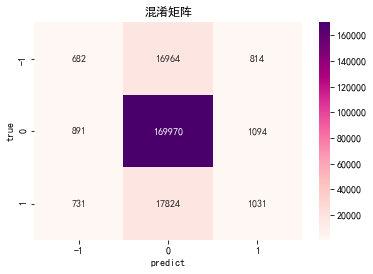

In [90]:
cfm = confusion_matrix(Ytest,y_predict,labels=[-1,0,1])
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['SimHei']
# plt.matshow(cfm)
# plt.show()
f,ax = plt.subplots()
sns.heatmap(cfm,annot=True,ax=ax,xticklabels=[-1,0,1],yticklabels=[-1,0,1],fmt="d",cmap="RdPu")
ax.set_title('混淆矩阵')
ax.set_xlabel('predict')
ax.set_ylabel('true')
plt.show()

In [91]:
# 精确率
from sklearn.metrics import precision_score as P,recall_score as R
P(Ytest,y_predict,average='weighted')

0.7384498985583728

In [92]:
#召回率
from sklearn.metrics import precision_score as P,recall_score as R
R(Ytest,y_predict,average='weighted')

0.8175342022180847

In [93]:
# f1 score
from sklearn.metrics import f1_score 
f1_score(Ytest,y_predict,average='weighted')

0.7532113853817141

In [181]:
bt_data

time      open      high       low     close   volume  \
700000   2021-01-11 18:17:00  32845.93  32861.42  32755.00  32777.42  238.773   
700001   2021-01-11 18:18:00  32780.13  32861.43  32681.44  32840.76  320.455   
700002   2021-01-11 18:19:00  32840.81  32880.20  32760.48  32763.21  187.515   
700003   2021-01-11 18:20:00  32760.50  32761.72  32616.00  32643.27  287.835   
700004   2021-01-11 18:21:00  32638.78  32868.00  32631.38  32791.01  295.555   
...                      ...       ...       ...       ...       ...      ...   
1013668  2021-08-17 14:05:00  46457.39  46469.01  46417.33  46420.84  167.841   
1013669  2021-08-17 14:06:00  46420.84  46422.08  46395.60  46401.00  121.713   
1013670  2021-08-17 14:07:00  46401.00  46407.65  46372.00  46383.00  107.341   
1013671  2021-08-17 14:08:00  46383.00  46385.21  46350.00  46350.17  170.771   
1013672  2021-08-17 14:09:00  46350.16  46365.57  46321.00  46322.31  230.130   

         label5  label  ud_ma20  ud_ma30  ud_ma40  ud_ma60  MACD      MoM1  \
700000    78.45    1.0     -1.0      0.0      0.0     -1.0   1.0 -1.692687   
700001   -60.85   -1.0      1.0      0.0      0.0      1.0   1.0  1.559042   
700002   221.09    1.0     -1.0     -1.0     -1.0     -1.0   1.0 -1.909156   
700003   365.31    1.0      0.0      0.0      0.0      0.0  -1.0 -2.958720   
700004   192.43    1.0      0.0      1.0      0.0      0.0  -1.0  3.653831   
...         ...    ...      ...      ...      ...      ...   ...       ...   
1013668  -92.44   -1.0     -1.0      0.0      0.0      0.0   1.0 -0.637281   
1013669  -84.35   -1.0      0.0      0.0      0.0      0.0   1.0 -0.347029   
1013670 -158.01   -1.0      0.0      0.0      0.0      0.0   1.0 -0.315147   
1013671 -149.57   -1.0      0.0      0.0      0.0      0.0  -1.0 -0.573520   
1013672  -92.33   -1.0      0.0      0.0      0.0      0.0  -1.0 -0.487316   

             MoM3      MoM5  weekofday    c_sin5  
700000  -1.396297  1.641395        0.1  0.556084  
700001  -1.714108 -0.402479        0.1 -0.686609  
700002  -1.201610 -1.257480        0.1 -0.156209  
700003  -1.944936 -3.575308        0.1 -0.424262  
700004  -0.721888 -0.629056        0.1  0.999262  
...           ...       ...        ...       ...  
1013668  0.169216 -0.182116        0.2 -0.964199  
1013669 -0.032814  0.305514        0.2  0.990496  
1013670 -0.762863 -0.172324        0.2 -0.869608  
1013671 -0.725442 -0.434919        0.2 -0.969018  
1013672 -0.807753 -1.085949        0.2  0.951579  

[313673 rows x 18 columns]

In [182]:
bit1 = np.array(bt_data.iloc[:,8:])
target1 = np.array(bt_data.label)
bit1,target1

(array([[-1.        ,  0.        ,  0.        , ...,  1.64139484,
          0.1       ,  0.55608356],
        [ 1.        ,  0.        ,  0.        , ..., -0.40247936,
          0.1       , -0.68660913],
        [-1.        , -1.        , -1.        , ..., -1.25748039,
          0.1       , -0.15620906],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.17232385,
          0.2       , -0.86960776],
        [ 0.        ,  0.        ,  0.        , ..., -0.43491887,
          0.2       , -0.96901766],
        [ 0.        ,  0.        ,  0.        , ..., -1.08594909,
          0.2       ,  0.95157949]]),
 array([ 1., -1.,  1., ..., -1., -1., -1.]))

In [184]:
bty_predict = rfc.predict(bit1)
bty_predict

array([-1., -1.,  1., ...,  0., -1.,  0.])

In [183]:
rfc.score(bit1,target1)

0.790517513461471

In [185]:
bt_data['predicted'] = bty_predict

In [187]:
s_data = bt_data[['time','open','high','low','close','label','predicted']]
s_data

time      open      high       low     close  label  \
700000   2021-01-11 18:17:00  32845.93  32861.42  32755.00  32777.42    1.0   
700001   2021-01-11 18:18:00  32780.13  32861.43  32681.44  32840.76   -1.0   
700002   2021-01-11 18:19:00  32840.81  32880.20  32760.48  32763.21    1.0   
700003   2021-01-11 18:20:00  32760.50  32761.72  32616.00  32643.27    1.0   
700004   2021-01-11 18:21:00  32638.78  32868.00  32631.38  32791.01    1.0   
...                      ...       ...       ...       ...       ...    ...   
1013668  2021-08-17 14:05:00  46457.39  46469.01  46417.33  46420.84   -1.0   
1013669  2021-08-17 14:06:00  46420.84  46422.08  46395.60  46401.00   -1.0   
1013670  2021-08-17 14:07:00  46401.00  46407.65  46372.00  46383.00   -1.0   
1013671  2021-08-17 14:08:00  46383.00  46385.21  46350.00  46350.17   -1.0   
1013672  2021-08-17 14:09:00  46350.16  46365.57  46321.00  46322.31   -1.0   

         predicted  
700000        -1.0  
700001        -1.0  
700002         1.0  
700003         1.0  
700004         1.0  
...            ...  
1013668        0.0  
1013669       -1.0  
1013670        0.0  
1013671       -1.0  
1013672        0.0  

[313673 rows x 7 columns]

In [188]:
s_data.to_csv("s_data.csv")

In [ ]:
import pandas as pd
df = pd.read

In [12]:
def process_bar(percent, start_str='', end_str='', total_length=0):
    bar = ''.join(["\033[31m%s\033[0m"%'   '] * int(percent * total_length)) + ''
    bar = '\r' + start_str + bar.ljust(total_length) + ' {:0>4.1f}%|'.format(percent*100) + end_str
    print(bar, end='', flush=True)

In [ ]:
#调参
scorel = []
n_estimatorsl = []
step = 10
for i in range(10,200,step):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,bit,target,cv=10).mean()
    scorel.append(score)
    n_estimatorsl.append(i+1)
    scoreldf = pd.DataFrame({"n_estimators":n_estimatorsl,"score":scorel})
    scoreldf.to_csv('scoreldf.csv')
    end_str = '100%'
    process_bar((i+step)/len(range(10,200)), start_str='', end_str=end_str, total_length=15)
print(max(scorel),(scorel.index(max(scorel))*step)+1)
plt.figure(figsize=[20,5])
plt.plot(range(11,201,step),scorel)
plt.show()

                      52.6%|100%

c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


                         57.9%|100%

c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


                            63.2%|100%

c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


                               68.4%|100%

c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py", line 357, in _sendback_result
    exception=exception))
  File "c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\backend\queues.py", line 241, in put
    obj = dumps(obj, reducers=self._reducers)
  File "c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\backend\reduction.py", line 271, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\exte

                                     84.2%|100%

c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\j

                                           94.7%|100%

c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
c:\users\17218\appdata\local\programs\python\python37\lib\site-packages\j

                                              100.0%|100%

In [58]:
s = [0,1,2,3,4,5,6,7,8,9,10]
t = [10,20,30,40,50,60,70,80,90,100,110]
data = {"n_estimators":t,
       "score":s}
df = pd.DataFrame(data)
df

n_estimators  score
0             10      0
1             20      1
2             30      2
3             40      3
4             50      4
5             60      5
6             70      6
7             80      7
8             90      8
9            100      9
10           110     10